## Functions to grab features from a directory

In [2]:
import os
import numpy as np

def feature_from_file(file_path, feature_type="head", byte_num=512): # will add more feature_type later
    """Retreives features from a file.
  
    Parameters:
    feature_type (str): "head" to get bytes from head of the file.
    byte_num (int): Number of bytes to grab.
    file_path (str): File path of file to get features from.
    
    Returns:
    List of bytes from file_path. 
    """
    with open(file_path, 'rb') as f:
        byte = f.read(1)
        index = 1
        features = []
    
        while byte and index <= byte_num:
            features.append(byte)
            index += 1
            byte = f.read(1)
        
        if len(features) < byte_num:
            features.extend([b'' for i in range(byte_num - len(features))])

        assert len(features) == byte_num
        return features

def feature_from_dir(dir_path, feature_type="head", byte_num=512):
    """Takes a directory and grabs features from each file.
    
    Parameters:
    dir_path (str): Path of directory to take features from.
    feature_type (str): Type of features to get.
    byte_num (str): Number of features to take
    
    Return:
    features (list): List containing a list of byte_num bytes from each fie in dir_path.
    """
    features = []
    for (dirpath, dirnames, filenames) in os.walk(dir_path):
        for filename in filenames:
            features.append(feature_from_file(os.path.join(dirpath, filename), feature_type, byte_num))
    
    return features

def translate_bytes(dir_features):
    """Translates bytes into integers.
    
    Parameter:
    dir_features (list): List containing lists of bytes.
    
    Return:
    translated_features (numpy array): dir_features with bytes translated to integers.
    """
    translated_features = np.zeros((len(dir_features), len(dir_features[0])))
    
    for idx, file_features in enumerate(dir_features):
        translated_features[idx] = np.array([int.from_bytes(c, byteorder="big") for c in file_features])
    
    return translated_features

## Feature preprocessing

In [3]:
from sklearn.model_selection import train_test_split

test_set_dir = '/Users/ryan/Documents/CS/CDAC/official_xtract/sampler_dataset/pub8'

raw_features = feature_from_dir(test_set_dir, byte_num=512)
untranslated_features = translate_bytes(raw_features)
x = untranslated_features / 255

x_train, x_test, _, _ = train_test_split(x, x)

print(raw_features[0])
print(untranslated_features[0])
print(x[0])

[b'S', b'O', b'C', b'A', b'T', b' ', b'd', b'a', b't', b'a', b' ', b'r', b'e', b'p', b'o', b'r', b't', b' ', b'c', b'r', b'e', b'a', b't', b'e', b'd', b':', b' ', b'2', b'0', b'1', b'5', b'-', b'1', b'0', b'-', b'2', b'8', b' ', b'1', b'9', b':', b'1', b'4', b' ', b'+', b'0', b'0', b'0', b'0', b'\n', b'D', b'O', b'I', b' ', b'o', b'f', b' ', b't', b'h', b'e', b' ', b'e', b'n', b't', b'i', b'r', b'e', b' ', b'S', b'O', b'C', b'A', b'T', b' ', b'c', b'o', b'l', b'l', b'e', b'c', b't', b'i', b'o', b'n', b':', b' ', b'1', b'0', b'.', b'1', b'5', b'9', b'4', b'/', b'P', b'A', b'N', b'G', b'A', b'E', b'A', b'.', b'8', b'4', b'9', b'7', b'7', b'0', b'\n', b' ', b' ', b' ', b' ', b'o', b'r', b' ', b's', b'e', b'e', b':', b' ', b'h', b't', b't', b'p', b':', b'/', b'/', b'd', b'o', b'i', b'.', b'p', b'a', b'n', b'g', b'a', b'e', b'a', b'.', b'd', b'e', b'/', b'1', b'0', b'.', b'1', b'5', b'9', b'4', b'/', b'P', b'A', b'N', b'G', b'A', b'E', b'A', b'.', b'8', b'4', b'9', b'7', b'7', b'0', b'\n', 

In [20]:
import random
from sklearn.model_selection import train_test_split

x = np.zeros((30000, 512))
for idx, thing in enumerate(x):
    x[idx] = [random.randint(0, 255) for i in range(512)]

x = x / 255
print(x[0])

x_train, x_test, _, _ = train_test_split(x,x)

[0.24705882 0.66666667 0.56470588 0.82352941 0.78039216 0.72941176
 0.42745098 0.89411765 0.89019608 0.26666667 0.14509804 0.12941176
 0.2        0.21568627 0.10196078 0.60392157 0.7372549  0.77254902
 0.16078431 0.78039216 0.82745098 0.25882353 0.80784314 0.72156863
 0.30980392 0.6627451  0.55294118 0.52941176 0.15294118 0.4
 0.50980392 0.88235294 0.83137255 0.13333333 0.85882353 0.86666667
 0.16862745 0.10196078 0.89411765 0.55686275 0.0745098  0.96470588
 0.0627451  0.94509804 0.01960784 0.37254902 0.52941176 0.85490196
 0.08235294 0.29411765 0.78823529 0.85098039 0.96862745 1.
 0.76078431 0.43529412 0.39607843 0.02745098 0.94509804 0.68235294
 0.23137255 0.30588235 0.30980392 0.78039216 0.80392157 0.24705882
 0.25490196 0.59215686 0.89803922 0.96078431 0.94117647 0.36862745
 0.32156863 0.13333333 0.07843137 0.0627451  0.71764706 0.69019608
 0.27058824 0.48235294 0.16470588 0.10980392 0.4627451  0.77254902
 0.63529412 0.21960784 0.50588235 0.27058824 0.33333333 0.13333333
 0.4784313

## Keras model

In [21]:
from keras.models import Model
from keras.layers import Input, Dense, ELU

input_size = len(x_train[0])

input_layer = Input((input_size,))
encoded = Dense(64)(input_layer)
encoded = ELU(alpha=0.5)(encoded)
encoded = Dense(32)(encoded)
encoded = ELU(alpha=0.5)(encoded)
decoded = Dense (64)(encoded)
decoded = ELU(alpha=0.5)(decoded)
decoded = Dense(input_size, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.summary()

history = autoencoder.fit(x_train, x_train,
                          epochs=200,
                          batch_size = 128,
                          shuffle=True,
                          validation_data=(x_test, x_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                32832     
_________________________________________________________________
elu_9 (ELU)                  (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
elu_10 (ELU)                 (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                2112      
_________________________________________________________________
elu_11 (ELU)                 (None, 64)                0         
__________

22500/22500 [==============================] - 1s 33us/step - loss: 0.6860 - acc: 0.0050 - val_loss: 0.6863 - val_acc: 0.0049
Epoch 50/200
22500/22500 [==============================] - 1s 34us/step - loss: 0.6858 - acc: 0.0050 - val_loss: 0.6861 - val_acc: 0.0049
Epoch 51/200
22500/22500 [==============================] - 1s 33us/step - loss: 0.6857 - acc: 0.0050 - val_loss: 0.6860 - val_acc: 0.0049
Epoch 52/200
22500/22500 [==============================] - 1s 33us/step - loss: 0.6855 - acc: 0.0050 - val_loss: 0.6858 - val_acc: 0.0049
Epoch 53/200
22500/22500 [==============================] - 1s 35us/step - loss: 0.6854 - acc: 0.0051 - val_loss: 0.6857 - val_acc: 0.0049
Epoch 54/200
22500/22500 [==============================] - 1s 33us/step - loss: 0.6852 - acc: 0.0051 - val_loss: 0.6856 - val_acc: 0.0049
Epoch 55/200
22500/22500 [==============================] - 1s 33us/step - loss: 0.6851 - acc: 0.0051 - val_loss: 0.6855 - val_acc: 0.0049
Epoch 56/200
22500/22500 [==============

Epoch 108/200
22500/22500 [==============================] - 1s 36us/step - loss: 0.6820 - acc: 0.0053 - val_loss: 0.6830 - val_acc: 0.0051
Epoch 109/200
22500/22500 [==============================] - 1s 36us/step - loss: 0.6820 - acc: 0.0053 - val_loss: 0.6830 - val_acc: 0.0051
Epoch 110/200
22500/22500 [==============================] - 1s 36us/step - loss: 0.6820 - acc: 0.0053 - val_loss: 0.6830 - val_acc: 0.0051
Epoch 111/200
22500/22500 [==============================] - 1s 35us/step - loss: 0.6820 - acc: 0.0053 - val_loss: 0.6830 - val_acc: 0.0051
Epoch 112/200
22500/22500 [==============================] - 1s 36us/step - loss: 0.6820 - acc: 0.0053 - val_loss: 0.6830 - val_acc: 0.0051
Epoch 113/200
22500/22500 [==============================] - 1s 35us/step - loss: 0.6820 - acc: 0.0053 - val_loss: 0.6830 - val_acc: 0.0051
Epoch 114/200
22500/22500 [==============================] - 1s 35us/step - loss: 0.6820 - acc: 0.0053 - val_loss: 0.6830 - val_acc: 0.0051
Epoch 115/200
22500/

22500/22500 [==============================] - 1s 35us/step - loss: 0.6815 - acc: 0.0053 - val_loss: 0.6829 - val_acc: 0.0051
Epoch 167/200
22500/22500 [==============================] - 1s 35us/step - loss: 0.6815 - acc: 0.0053 - val_loss: 0.6829 - val_acc: 0.0051
Epoch 168/200
22500/22500 [==============================] - 1s 35us/step - loss: 0.6815 - acc: 0.0053 - val_loss: 0.6829 - val_acc: 0.0051
Epoch 169/200
22500/22500 [==============================] - 1s 34us/step - loss: 0.6815 - acc: 0.0053 - val_loss: 0.6829 - val_acc: 0.0051
Epoch 170/200
22500/22500 [==============================] - 1s 34us/step - loss: 0.6815 - acc: 0.0053 - val_loss: 0.6829 - val_acc: 0.0051
Epoch 171/200
22500/22500 [==============================] - 1s 35us/step - loss: 0.6815 - acc: 0.0053 - val_loss: 0.6829 - val_acc: 0.0051
Epoch 172/200
22500/22500 [==============================] - 1s 34us/step - loss: 0.6815 - acc: 0.0053 - val_loss: 0.6829 - val_acc: 0.0051
Epoch 173/200
22500/22500 [=======

In [16]:
weights = autoencoder.get_weights()
for idx, weight in enumerate(weights):
    print("LAYER {}".format(idx))
    print(weight)

LAYER 0
[[ 0.04516916 -0.11460132  0.00158543 ...  0.02157585  0.031204
  -0.07058668]
 [-0.04159594 -0.19428807  0.07823841 ...  0.07592207 -0.05109053
  -0.04396152]
 [-0.156869    0.04172282 -0.08458458 ...  0.06972968  0.07720609
  -0.04586922]
 ...
 [ 0.02052808  0.02928666 -0.06108273 ...  0.04808288  0.01113593
   0.06107713]
 [ 0.10532656  0.05753546  0.038265   ...  0.04207017 -0.04915527
   0.02855334]
 [ 0.10043205 -0.06568845 -0.05911394 ...  0.08024327 -0.03173422
   0.12120359]]
LAYER 1
[-5.30932844e-01  5.83524466e-01 -1.21704906e-01  6.15366042e-01
  8.74747336e-01 -1.45123988e-01  5.81771135e-01  4.74385142e-01
 -3.70074093e-01 -3.00137043e-01  2.44794503e-01 -9.55730826e-02
  1.04448423e-01  1.14490964e-01  3.88405323e-02  3.41689996e-02
  3.66036922e-01 -3.35229516e-01  3.84234756e-01 -4.16607074e-02
  8.13068986e-01 -6.88292980e-02  1.31359720e+00 -2.94336975e-01
  2.30335414e-01 -1.53482407e-01 -2.36116841e-01  7.00363442e-02
  1.24582894e-01  1.02526076e-01  9.516

## Results visualization

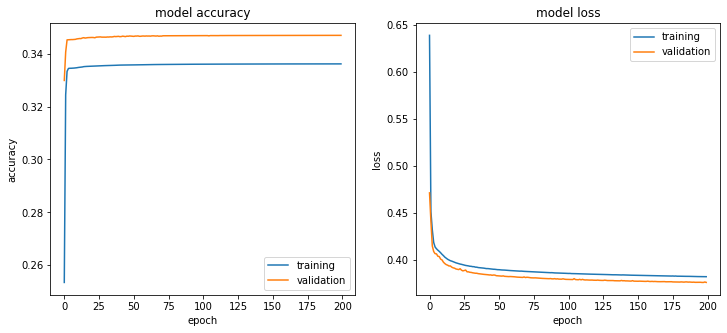

In [17]:
%%capture --no-display 
import matplotlib.pyplot as plt

# set up figure
f = plt.figure(figsize=(12,5))
f.add_subplot(1,2, 1)

# plot accuracy as a function of epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

# plot loss as a function of epoch
f.add_subplot(1,2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show(block=True)